In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#pre-processing libraries
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train.csv')
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
test = pd.read_csv('test.csv')
test.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [6]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [7]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [9]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
train.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [11]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [13]:
#Let us simply impute missing values using mode in category 2 and 3
train['Product_Category_2'] = train['Product_Category_2'].fillna(train.Product_Category_2.mode()[0])
train['Product_Category_3'] = train['Product_Category_3'].fillna(train.Product_Category_3.mode()[0])

test['Product_Category_2'] = test['Product_Category_2'].fillna(test.Product_Category_2.mode()[0])
test['Product_Category_3'] = test['Product_Category_3'].fillna(test.Product_Category_3.mode()[0])

test.Product_Category_3.head(10)

0    16.0
1    16.0
2    16.0
3    16.0
4    12.0
5    15.0
6    15.0
7     9.0
8    16.0
9    16.0
Name: Product_Category_3, dtype: float64

In [14]:
test["Product_Category_2"] = test.Product_Category_2.apply(lambda x: str(x)[:-2])
test["Product_Category_3"] = test.Product_Category_3.apply(lambda x: str(x)[:-2])

train["Product_Category_2"] = train.Product_Category_2.apply(lambda x: str(x)[:-2])
train["Product_Category_3"] = train.Product_Category_3.apply(lambda x: str(x)[:-2])

train.Product_Category_3.head()

0    16
1    14
2    16
3    16
4    16
Name: Product_Category_3, dtype: object

In [15]:
!pip install category_encoders

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import category_encoders as ce

In [17]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'4+':'4'})

In [18]:
feat1 = ["Gender", "Age","Stay_In_Current_City_Years"]
encoder1 = LabelEncoder()
for f1 in feat1:
    train[f1] = encoder1.fit_transform(train[f1].astype('str'))

In [19]:
lb = LabelBinarizer()

In [20]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [21]:
enc_feat = ['Product_Category_1','Product_Category_2', 'Product_Category_3', 'Occupation', 'City_Category',]

In [22]:
train_bin = train.copy()
encode_bin = ce.BinaryEncoder(cols=enc_feat)
train_bin = encode_bin.fit_transform(train_bin)

In [23]:
train_bin.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'City_Category_0', 'City_Category_1', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1_0', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_2_0', 'Product_Category_2_1', 'Product_Category_2_2',
       'Product_Category_2_3', 'Product_Category_2_4', 'Product_Category_3_0',
       'Product_Category_3_1', 'Product_Category_3_2', 'Product_Category_3_3',
       'Purchase'],
      dtype='object')

In [24]:
test_bin = test.copy()
encode_bin = ce.BinaryEncoder(cols=enc_feat)
test_bin = encode_bin.fit_transform(test_bin)
test_bin.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'City_Category_0', 'City_Category_1', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1_0', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_2_0', 'Product_Category_2_1', 'Product_Category_2_2',
       'Product_Category_2_3', 'Product_Category_2_4', 'Product_Category_3_0',
       'Product_Category_3_1', 'Product_Category_3_2', 'Product_Category_3_3'],
      dtype='object')

In [25]:
train_grouped = train.copy()
train_grouped['Frequency_prod'] = 1
train_grouped['Product_Score'] = 0.0

train_grouped_prod = train_grouped.groupby(['Product_ID']).sum()

train_grouped_prod.head()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Frequency_prod,Product_Score
Product_ID,,,,,,,,,,
P00000142,1155549402,805,2600,9220,996,435,3456,12837476,1152,0.0
P00000242,377161644,285,863,2860,319,140,752,3967496,376,0.0
P00000342,244674888,175,614,1953,213,97,1220,1296475,244,0.0
P00000442,92284575,46,204,630,76,38,460,441173,92,0.0
P00000542,149492005,99,327,1088,123,46,745,807212,149,0.0


In [26]:
max_freq_prod = train_grouped_prod.Frequency_prod.max()
train_grouped_prod['Product_Score'] = train_grouped_prod['Frequency_prod'].apply(lambda x: float(x)/float(max_freq_prod))
train_grouped_prod = train_grouped_prod.reset_index()
train_grouped_prod['Product_Score'].head()

0    0.612766
1    0.200000
2    0.129787
3    0.048936
4    0.079255
Name: Product_Score, dtype: float64

In [27]:
train_grouped['Frequency_user'] = 1
train_grouped['User_Score'] = 0.0
train_grouped_user = train_grouped.groupby(['User_ID']).sum()
train_grouped_user.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Frequency_prod,Product_Score,Frequency_user,User_Score
User_ID,,,,,,,,,,,
1000001,0,0,350,35,0,213,334093,35,0.0,35,0.0
1000002,77,462,1232,0,0,354,810472,77,0.0,77,0.0
1000003,29,58,435,29,0,93,341635,29,0.0,29,0.0
1000004,14,56,98,14,14,33,206468,14,0.0,14,0.0
1000005,106,212,2120,106,106,659,821001,106,0.0,106,0.0


In [28]:
max_freq_user = train_grouped_user.Frequency_user.max()
train_grouped_user['User_Score'] = train_grouped_user['Frequency_user'].apply(lambda x: float(x)/float(max_freq_user))
train_grouped_user = train_grouped_user.reset_index()
train_grouped_user['User_Score'].head()


0    0.034113
1    0.075049
2    0.028265
3    0.013645
4    0.103314
Name: User_Score, dtype: float64

In [29]:
test_grouped = test.copy()
test_grouped['Frequency_prod'] = 1
test_grouped['Product_Score'] = 0.0

test_grouped_prod = test_grouped.groupby(['Product_ID']).sum()


max_freq_prod = test_grouped_prod.Frequency_prod.max()
test_grouped_prod['Product_Score'] = test_grouped_prod['Frequency_prod'].apply(lambda x: float(x)/float(max_freq_prod))
test_grouped_prod = test_grouped_prod.reset_index()
test_grouped_prod['Product_Score'].head()

0    0.583836
1    0.205066
2    0.126659
3    0.041013
4    0.096502
Name: Product_Score, dtype: float64

In [30]:
test_grouped['Frequency_user'] = 1
test_grouped['User_Score'] = 0.0
test_grouped_user = test_grouped.groupby(['User_ID']).sum()

max_freq_user = test_grouped_user.Frequency_user.max()
test_grouped_user['User_Score'] = test_grouped_user['Frequency_user'].apply(lambda x: float(x)/float(max_freq_user))
test_grouped_user = test_grouped_user.reset_index()
test_grouped_user['User_Score'].head()


0    0.027149
1    0.067873
2    0.027149
3    0.002262
4    0.101810
Name: User_Score, dtype: float64

In [31]:
train_new = train.copy()

In [32]:
test_new = test.copy()

In [33]:
for ix,row in train_new.iterrows():
    p_score = train_grouped_prod.loc[train_grouped_prod['Product_ID']==row['Product_ID'],'Product_Score'].values[0]
    train_new.at[ix,'Product_score']=p_score

In [34]:
train_new['Product_score'].head()

0    0.120745
1    0.309043
2    0.054255
3    0.181383
4    0.107979
Name: Product_score, dtype: float64

In [35]:
for ix,row in train_new.iterrows():
    u_score = train_grouped_user.loc[train_grouped_user['User_ID']==row['User_ID'],'User_Score'].values[0]
    train_new.at[ix,'User_score']=u_score

In [36]:
for ix,row in test_new.iterrows():
    p_score = test_grouped_prod.loc[test_grouped_prod['Product_ID']==row['Product_ID'],'Product_Score'].values[0]
    test_new.at[ix,'Product_score']=p_score

In [37]:
for ix,row in test_new.iterrows():
    u_score = test_grouped_user.loc[test_grouped_user['User_ID']==row['User_ID'],'User_Score'].values[0]
    test_new.at[ix,'User_score']=u_score

In [38]:
df = train_new.copy()
labenc = LabelEncoder()
flist = ["Product_ID", "City_Category", "Product_Category_2", "Product_Category_3"]
for i in flist:
  df[i] = labenc.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  int64  
 10  Product_Category_3          550068 non-null  int64  
 11  Purchase                    550068 non-null  int64  
 12  Product_score               550068 non-null  float64
 13  User_score    

In [39]:
corrmat = df.corr()

In [40]:
corrmat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, User_ID to User_score
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     14 non-null     float64
 1   Product_ID                  14 non-null     float64
 2   Gender                      14 non-null     float64
 3   Age                         14 non-null     float64
 4   Occupation                  14 non-null     float64
 5   City_Category               14 non-null     float64
 6   Stay_In_Current_City_Years  14 non-null     float64
 7   Marital_Status              14 non-null     float64
 8   Product_Category_1          14 non-null     float64
 9   Product_Category_2          14 non-null     float64
 10  Product_Category_3          14 non-null     float64
 11  Purchase                    14 non-null     float64
 12  Product_score               14 non-null     float64
 13  User_score                  

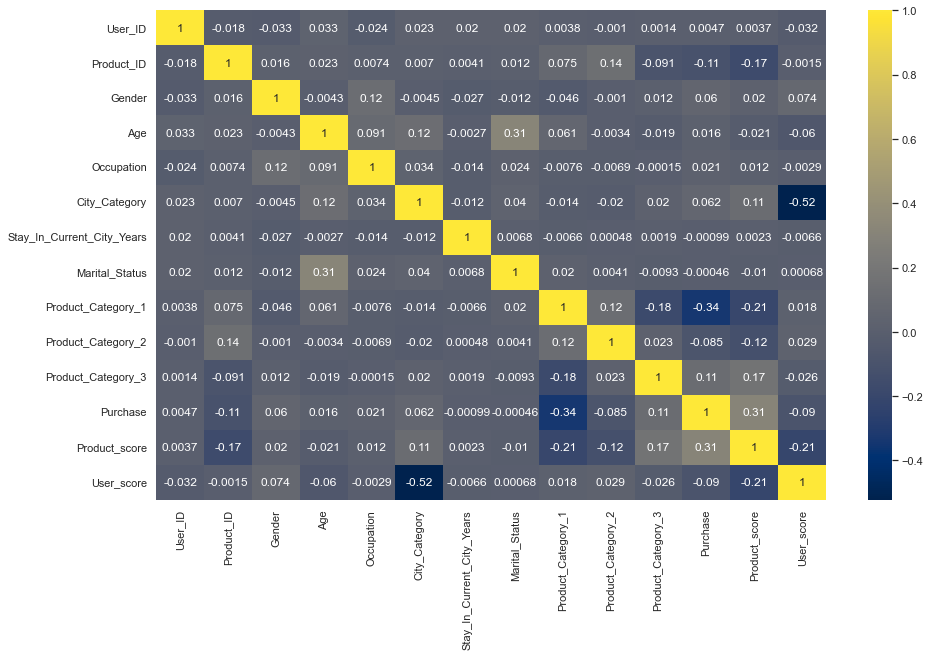

In [41]:
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(corrmat,annot=True,cmap='cividis')
plt.show()

In [42]:
train_bin.head()

,User_ID,Product_ID,Gender,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,City_Category_0,...,Product_Category_2_0,Product_Category_2_1,Product_Category_2_2,Product_Category_2_3,Product_Category_2_4,Product_Category_3_0,Product_Category_3_1,Product_Category_3_2,Product_Category_3_3,Purchase
0,1000001,P00069042,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,8370
1,1000001,P00248942,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,15200
2,1000001,P00087842,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1422
3,1000001,P00085442,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,1057
4,1000002,P00285442,1,6,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,7969


In [43]:
df_tr = train_bin.drop(['Gender', 'Age','Stay_In_Current_City_Years', 'Marital_Status','Purchase'],axis=1)
df_tr.columns

Index(['User_ID', 'Product_ID', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'City_Category_0', 'City_Category_1',
       'Product_Category_1_0', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_2_0',
       'Product_Category_2_1', 'Product_Category_2_2', 'Product_Category_2_3',
       'Product_Category_2_4', 'Product_Category_3_0', 'Product_Category_3_1',
       'Product_Category_3_2', 'Product_Category_3_3'],
      dtype='object')

In [44]:
df_ts = test_bin.drop(['Gender', 'Age','Stay_In_Current_City_Years', 'Marital_Status'],axis=1)
df_ts.columns

Index(['User_ID', 'Product_ID', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'City_Category_0', 'City_Category_1',
       'Product_Category_1_0', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_2_0',
       'Product_Category_2_1', 'Product_Category_2_2', 'Product_Category_2_3',
       'Product_Category_2_4', 'Product_Category_3_0', 'Product_Category_3_1',
       'Product_Category_3_2', 'Product_Category_3_3'],
      dtype='object')

In [45]:
train_new = pd.merge(train_new,df_tr,on=['User_ID', 'Product_ID'],how='outer')
train_new.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_score',
       'User_score', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'City_Category_0', 'City_Category_1',
       'Product_Category_1_0', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_2_0',
       'Product_Category_2_1', 'Product_Category_2_2', 'Product_Category_2_3',
       'Product_Category_2_4', 'Product_Category_3_0', 'Product_Category_3_1',
       'Product_Category_3_2', 'Product_Category_3_3'],
      dtype='object')

In [46]:
test_new = pd.merge(test_new,df_ts,on=['User_ID', 'Product_ID'],how='outer')
test_new.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Product_score',
       'User_score', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'City_Category_0', 'City_Category_1',
       'Product_Category_1_0', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_2_0',
       'Product_Category_2_1', 'Product_Category_2_2', 'Product_Category_2_3',
       'Product_Category_2_4', 'Product_Category_3_0', 'Product_Category_3_1',
       'Product_Category_3_2', 'Product_Category_3_3'],
      dtype='object')

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [48]:
def model_cv_score(model,data,target,randomstate):
    i=1;
    train_score = []
    test_score = []
    kf = KFold(n_splits=10,random_state=randomstate)
    for trian_ix,test_ix in kf.split(data):
        
        print("{} of Fold {}".format(i,kf.get_n_splits(data)))
        
        X_train, X_test = data.iloc[trian_ix], data.iloc[test_ix]
        y_train, y_test = target.iloc[trian_ix], target.iloc[test_ix]   
        '''
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        '''
        
        modelfit = model.fit(X_train,y_train)
        mse_train = mean_squared_error(y_true=y_train,y_pred=modelfit.predict(X_train))
        mse_test = mean_squared_error(y_true=y_test,y_pred=modelfit.predict(X_test))
        
        train_score.append(np.sqrt(mse_train))
        test_score.append(np.sqrt(mse_test))
        print("Train score: {}\nTest score: {}".format(np.sqrt(mse_train),np.sqrt(mse_test)))
        i += 1
    return train_score,test_score


In [49]:
df = train_new.drop(['Purchase','User_ID','Product_ID','Product_Category_1',
       'Product_Category_2', 'Product_Category_3','Occupation', 'City_Category',],axis=1)
target = train_new['Purchase']
target.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Stay_In_Current_City_Years  550068 non-null  int64  
 3   Marital_Status              550068 non-null  int64  
 4   Product_score               550068 non-null  float64
 5   User_score                  550068 non-null  float64
 6   Occupation_0                550068 non-null  int64  
 7   Occupation_1                550068 non-null  int64  
 8   Occupation_2                550068 non-null  int64  
 9   Occupation_3                550068 non-null  int64  
 10  Occupation_4                550068 non-null  int64  
 11  City_Category_0             550068 non-null  int64  
 12  City_Category_1             550068 non-null  int64  
 13  Product_Catego

# **Ensemble Models**








### **1.**   ***Decision Tree***



In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
from sklearn.tree import export_graphviz

In [53]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [54]:
params = {'min_samples_split':[2,3,10,15,30,40],
          'min_samples_leaf':[1,5,10,20],
          'splitter':['random','best']}

In [55]:
randomcv_dtree = RandomizedSearchCV(DecisionTreeRegressor(max_depth=9),param_distributions=params,scoring='neg_mean_squared_error',cv=10,random_state=42,return_train_score=True)

In [56]:
randomcv_dtree.fit(df,target)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=9),
                   param_distributions={'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 3, 10, 15, 30,
                                                              40],
                                        'splitter': ['random', 'best']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [57]:
randomcv_dtree.best_params_

{'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 20}

In [58]:
randomcv_dtree.best_score_

-8202327.704891548

In [59]:
np.sqrt(np.abs(randomcv_dtree.cv_results_['mean_train_score']))

array([2827.80573548, 2823.36861116, 2846.72283825, 2828.18328467,
       2834.64622349, 2828.18328467, 2834.81850616, 2827.6441453 ,
       2822.69298793, 2827.80573548])

In [60]:
np.sqrt(np.abs(randomcv_dtree.cv_results_['mean_test_score']))

array([2869.54724085, 2863.97061872, 2886.78528294, 2868.93133878,
       2872.23585804, 2960.26866628, 2874.86044969, 2961.23172238,
       2864.13806403, 2960.90860714])

In [61]:
print("For Decision Tree Model:\nMean_Train_score: {}\nMean_Test_Score:{}".format(
                                np.sqrt(np.abs(randomcv_dtree.cv_results_['mean_train_score'].mean())),
                                np.sqrt(np.abs(randomcv_dtree.cv_results_['mean_test_score'].mean()))))

For Decision Tree Model:
Mean_Train_score: 2830.1949661242347
Mean_Test_Score:2898.583055876012


In [62]:
model_scores = pd.read_csv("Model_scores.csv")

In [64]:
model_scores

,Unnamed: 0.1,Baseline,Linear,Ridge,Lasso,DecisionTree,RandomForest
0,Train,5022.990539,4177.085081,4177.470260,4213.681734,2832.881696,3153.398808
1,Test,5022.427633,4328.676072,4364.800154,4277.017714,2892.615198,3234.735280
2,Diffrence,0.562905,151.590992,187.329893,63.335980,59.733502,81.336472
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


model_scores['DecisionTree'] = [2832.8816960331596,2892.615198167304]
model_scores

model_scores.to_csv("Model_scores.csv")

### 1. Random Forest 


1.   Bagging algorithm : Creates n-number of trees, learning independently and results are based on some averaging process
2.   Selects the features as competitors for a node through max_feature parameters (int, log, square, etc techniques)
3.   The winner is decided based on he gini index, which determines the homogennity (it increses with each sub-node). 
> The gini index for each split is calculated as:
         Gini index = 1-[p(yes)]^2-[p(no)]^2
         p(yes) = probability of choosing yes
         p(no) = probability of choosing no
        
    **Feature with lowest calculated Gini index wins**
4.   **Point to Note:** Random forest by default uses bootstap as True to learn from random replacement(choosing) of samples from the data(it lead to duplication of samples and leading to loss of 1/3 *rd* of the dataset). To avoid this, we can pass it to be False, then it will use the whole dataset [Imagine it as a probability of choosing colored balls form a bag with and without replacement].






In [65]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV



In [66]:
md = [int(x) for x in np.linspace(10, 110, num = 11)]
md.append(None)

forest_param = {'max_depth':[3,5,6],
                'min_samples_split':[2,5,10,12,15],
                'min_samples_leaf':[1,2,4],
                'max_features':[11,12,13,14,15],
                
                }


In [ ]:
randomcv_forest = RandomizedSearchCV(RandomForestRegressor(),param_distributions=forest_param,scoring='neg_mean_squared_error',cv=10,return_train_score=True,random_state=42)
randomcv_forest.fit(df,target)

In [ ]:
randomcv_forest.best_params_

In [ ]:
np.sqrt(np.abs(randomcv_forest.cv_results_['mean_train_score']))

In [ ]:
np.sqrt(np.abs(randomcv_forest.cv_results_['mean_test_score']))

In [ ]:
print("For Random Forest Model:\nMean_Train_score: {}\nMean_Test_Score:{}".format(
                                np.sqrt(np.abs(randomcv_forest.cv_results_['mean_train_score'].mean())),
                                np.sqrt(np.abs(randomcv_forest.cv_results_['mean_test_score'].mean()))))

In [ ]:
scores = pd.read_csv("Model_scores.csv")
scores['RandomForest'] = [3153.3988082953906,3234.735280402418]
scores.head()

In [ ]:
scores.to_csv("Model_scoresRandomForestDTree.csv")